<a href="https://colab.research.google.com/github/Nur9702/Postgresql/blob/main/Regression_KNN_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [ ]:
housing = df[df.district=='Чиланзарский']
housing.head(10)

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
9,Чиланзарский,1,30.0,1,4,22200.0
11,Чиланзарский,3,67.0,2,5,30200.0
12,Чиланзарский,1,30.0,2,4,21200.0
13,Чиланзарский,1,30.0,2,4,21200.0
14,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [ ]:
from sklearn import linear_model
mlr_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['rooms', 'size', 'level', 'max_levels']])
y_train = np.asanyarray(train_set[['price']])

mlr_model.fit(x_train, y_train)

print('Koifsents:', mlr_model.coef_)
print('theta0:', mlr_model.intercept_)

Koifsents: [[-3010.03748405   862.9397714  -1555.84111641   148.01175648]]
theta0: [3458.35118233]


In [ ]:
x_test = np.asanyarray(train_set[['rooms', 'size', 'level', 'max_levels']])
y_test = np.asanyarray(train_set[['price']])
y_predict = mlr_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)

print(f"{MAE=}")
print(f"{MSE=}")

MAE=7383.274293780039
MSE=137734902.11793575


In [ ]:
from sklearn import linear_model
mlr_model = linear_model.LinearRegression()

#x_train = np.asanyarray(train_set[['rooms', 'size', 'level', 'max_levels']])
x_train = np.asanyarray(train_set[['size', 'max_levels']])
y_train = np.asanyarray(train_set[['price']])

mlr_model.fit(x_train, y_train)

print('Koifsents:', mlr_model.coef_)
print('theta0:', mlr_model.intercept_)

Koifsents: [[ 747.04795007 -393.4032521 ]]
theta0: [1341.57534414]


In [ ]:
#x_test = np.asanyarray(train_set[['rooms', 'size', 'level', 'max_levels']])
x_test = np.asanyarray(train_set[['size', 'max_levels']])
y_test = np.asanyarray(train_set[['price']])
y_predict = mlr_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)

print(f"{MAE=}")
print(f"{MSE=}")

MAE=7366.88989098419
MSE=146804736.3270303


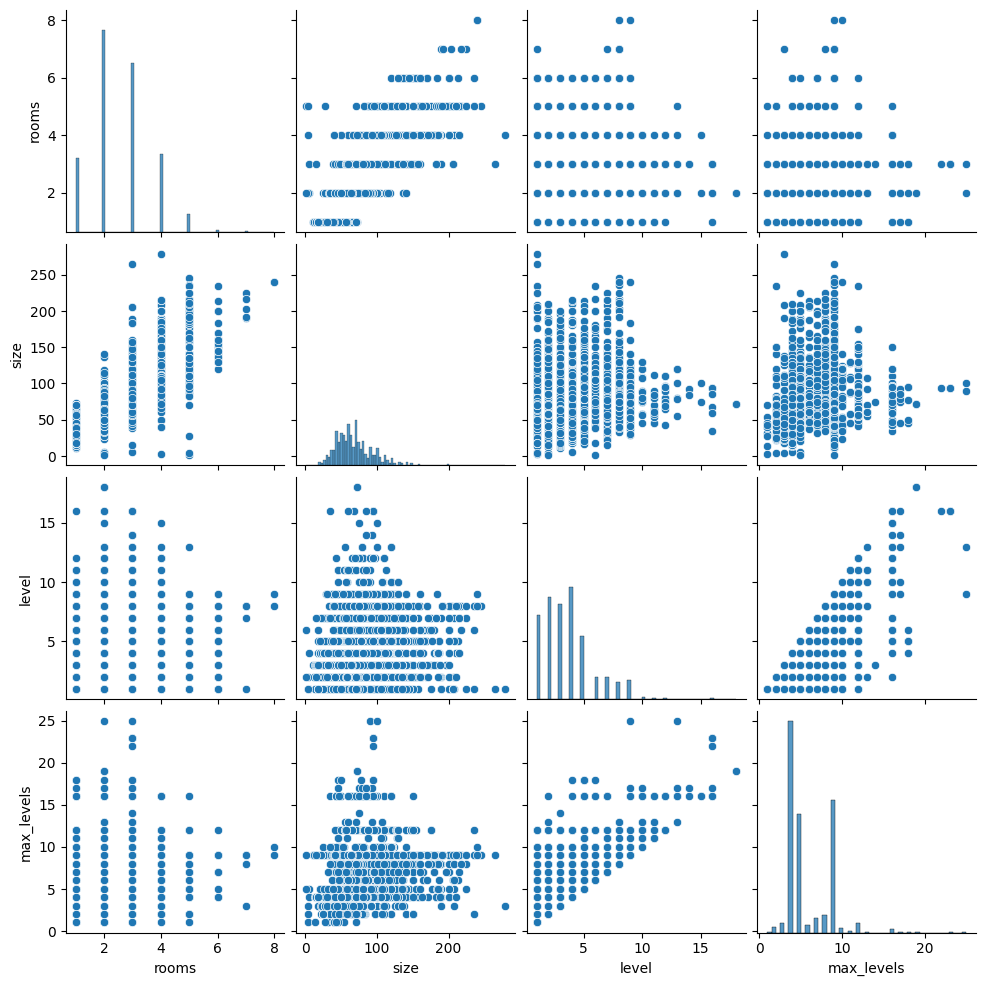

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df[[]])
plt.show()

#Polinomer Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"

df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


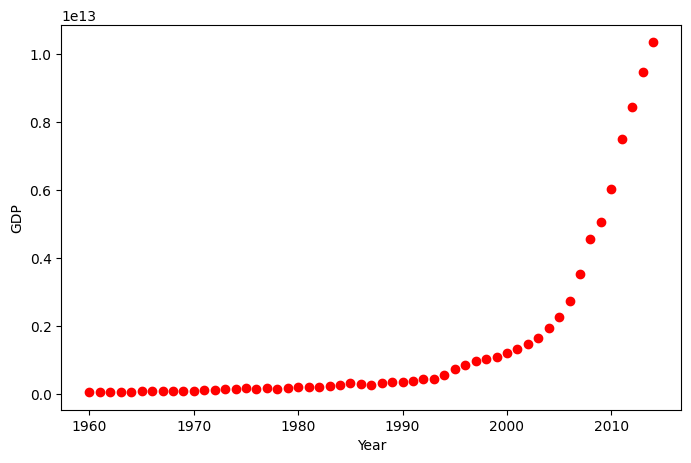

In [ ]:
plt.figure(figsize=(8, 5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
X = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

yhat = model.predict(X)

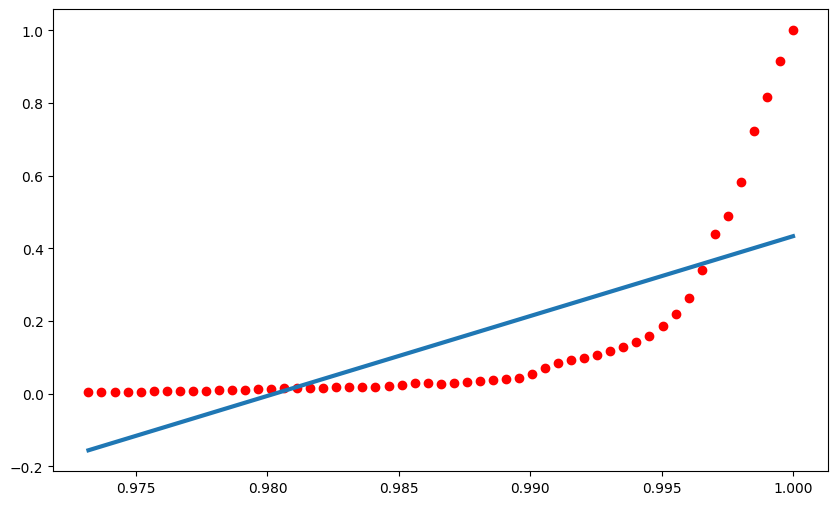

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,yhat, linewidth=3.0, label='fit')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat,y))

MAE: 0.12657979406214762


In [ ]:
X[0]

array([0.97318769])

#Polinemol Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly[0]

array([0.97318769, 0.94709427, 0.92170048, 0.89698756, 0.87293725])

In [ ]:
model.fit(X_poly, y)


LinearRegression()

In [ ]:
yhat = model.predict(X_poly)

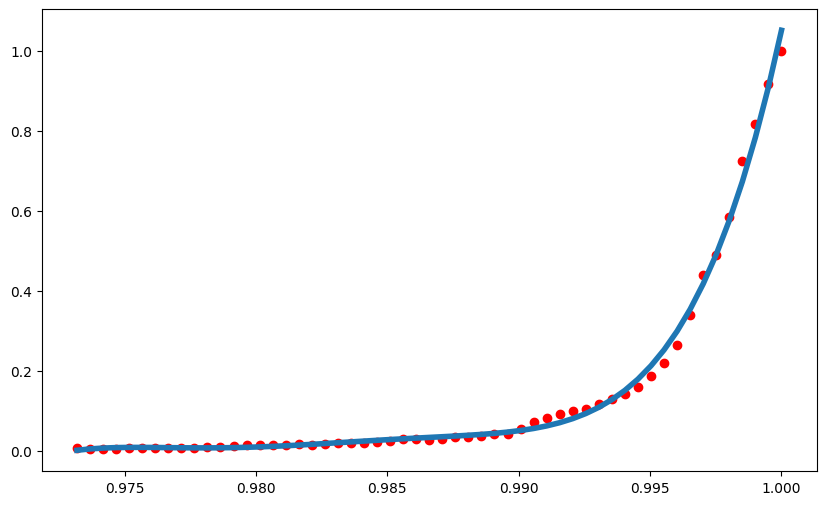

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,yhat, linewidth=4.0, label='fit')
plt.show()

In [ ]:
print("MAE:", mean_absolute_error(yhat,y))

MAE: 0.009253921906050316


#Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
  ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
  ("linear_regression", LinearRegression()),
])

polynomial_regression.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linear_regression', LinearRegression())])

## `curve_fit`
'curve_fit' yordamida o'zimiz yozgan funksiyalar asosida model qurishimiz mumkin.

Misol uchun, yuqoridagi ma'lumotlar Logistic regression funksiyasi yordamida aniqroq bashorat qilinishi mumkin.

# $$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

Keling, logisti regression funksiyasini yozib olamiz:

In [ ]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [ ]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517092123388
beta2=0.9972071272529931


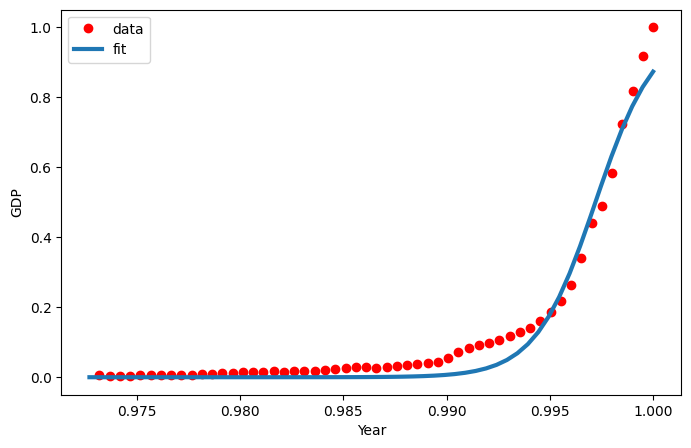

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.030498418823495136


#KNN sklearn

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
501,91504,M,13.82,24.49,92.33,595.9,0.11620,0.16810,0.135700,0.067590,...,16.01,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830
305,893061,B,11.60,24.49,74.23,417.2,0.07474,0.05688,0.019740,0.013130,...,12.44,31.62,81.39,476.5,0.09545,0.13610,0.07239,0.04815,0.3244,0.06745
127,866203,M,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.092710,0.056270,...,22.32,25.73,148.20,1538.0,0.10210,0.22640,0.32070,0.12180,0.2841,0.06541
289,89143601,B,11.37,18.89,72.17,396.0,0.08713,0.05008,0.023990,0.021730,...,12.36,26.14,79.29,459.3,0.11180,0.09708,0.07529,0.06203,0.3267,0.06994
386,902975,B,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,...,13.13,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
291,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.059400,0.048190,...,16.25,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472
181,873593,M,21.09,26.57,142.70,1311.0,0.11410,0.28320,0.248700,0.149600,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
545,922576,B,13.62,23.23,87.19,573.2,0.09246,0.06747,0.029740,0.024430,...,15.35,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
332,897132,B,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,...,11.98,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
522,91789,B,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,...,11.93,26.43,76.38,435.9,0.11080,0.07723,0.02533,0.02832,0.2557,0.07613


In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
from sklearn.preprocessing import LabelEncoder # bu usulda barcha klaslarni birdaniga o'zgartiradi.
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [ ]:
# df['diagnosis'] = df['diagnosis'].replace("M",1)
# df['diagnosis'] = df['diagnosis'].replace("B",0)
# df['diagnosis'].value_counts() Bunda barcha qatorlarni alohida yozib chiqish kerak.

In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False) #bu usulda korrelatsiyani bog'liqligini yaqin ko'rish mumkin

,0
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [ ]:
x = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#K-NN klassifikatori
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [ ]:
y_predict = knn.predict(x_test)

#Baholash

#Jaccard methodi

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.8695652173913043

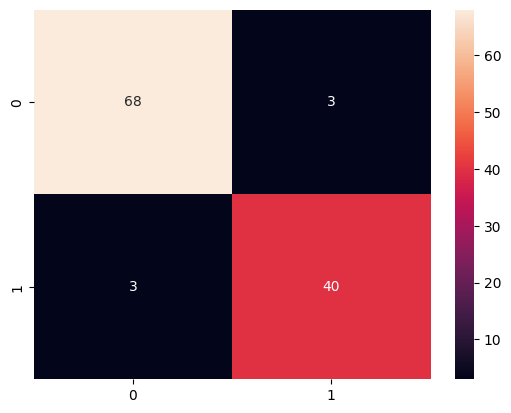

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.9302325581395349
recall=0.9302325581395349
f1=0.9302325581395349
accuracy=0.9473684210526315


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = x, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



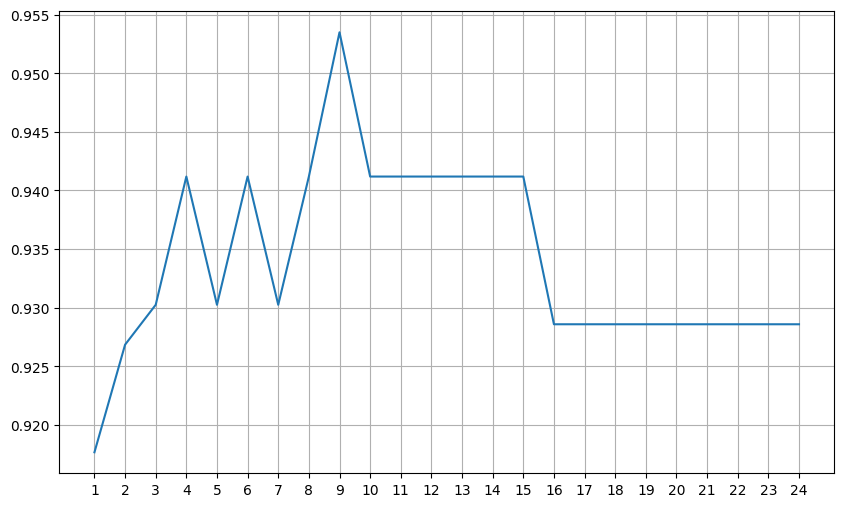

In [ ]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV #eng to'g'ri darajani topib beradi


param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.cv_results_['rank_test_score']

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16], dtype=int32)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [ ]:
knn_gscv.best_score_

0.968390001552554

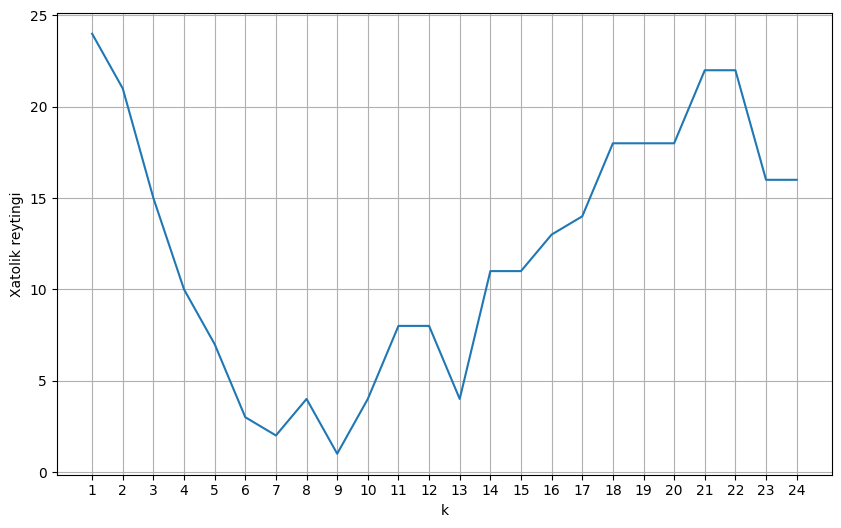

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()